In [1]:
library(tidyr)
library(dplyr)
library(stringr)
library(ggplot2)
library(ComplexHeatmap)
library(here)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167

here() starts at /Users/xiaoqin/Dropbox/UCL/Experiments/CyTOF/Signal Perturbation/Signal Perturbation - Analysis



In [2]:
# ---
# Prepare dataframe
# ---
# No normalisation
emd_df <- read.csv(here("output", "emd", "emd_df_master_all-cells_no-norm.csv"))
# Z-score
# emd_df <- read.csv(here("output", "emd", "emd_df_master_all-cells_z-score.csv"))
# head(emd_df)

In [3]:
# ---
# Subset on conditions
# ! Filtering on columns is also done with data subset, this may not be the most efficient way
# Generate metadata, cell-type and PTM marker lists on the fly
# ---

# No subsetting
emd_df_subset <- emd_df

# Subset conditions: Inhibitors only
# emd_df_subset <- emd_df %>% filter(ligand %in% c("Ctrl"))

# Subset conditions: Ligands only
# emd_df_subset <- emd_df %>% filter(inhibitor %in% c("Ctrl"))

# Subset conditions: Inihibitor focus
# emd_df_subset <- emd_df %>% filter(inhibitor %in% c("Ctrl", "ICG001"))
# emd_df_subset <- emd_df %>% filter(inhibitor %in% c("Ctrl", "Trametinib"))
# emd_df_subset <- emd_df %>% filter(inhibitor %in% c("Ctrl", "CA3"))

In [4]:
# ---
# Structure the heatmap
# * The last variable to be arranged will be the first row in the top annotation
# ---

head(emd_df_subset)
emd_df_subset <- emd_df_subset %>%
  arrange(factor(inhibitor, levels = c(
    "Ctrl",
    "CA3",
    "CHIR99021",
    "Dasatinib",
    "GDC0941",
    "ICG001",
    "PF573228",
    "SIS3",
    "Trametinib"
  ))) %>%
  arrange(factor(ligand, levels = c(
    "Ctrl",
    "WNT3A",
    "EREG",
    "TGFb1"
  ))) %>%
  arrange(factor(genotype,
    levels =
      c("WT", "A", "K", "AK")
  ))
head(emd_df_subset)

# emd_df_subset <- emd_df_subset %>% filter(genotype %in% c("WT"))
# emd_df_subset <- emd_df_subset %>% filter(genotype %in% c("A"))
# emd_df_subset <- emd_df_subset %>% filter(genotype %in% c("K"))
# emd_df_subset <- emd_df_subset %>% filter(genotype %in% c("AK"))

,batch,barcode,genotype,media,replicate,culture,condition,ligand,inhibitor,A,⋯,X172Yb_pS6_S240_S244_2,X173Yb_Cyclin.B1_2,X174Yb_Clusterin_1,X175Lu_Survivin_2,X176Yb_FABP2,X191Ir_DNA.1,X193Ir_DNA.2,X194Pt_Cisplatin,X209Bi_DiMeHH3_K4,X89Y_pHH3_S28
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B1,1,A,Ctrl-Ctrl,1,A_Ctrl-Ctrl,B1_A_Ctrl-Ctrl_1,Ctrl,Ctrl,1,⋯,0.33865476,-0.26504302,-0.29801126,0.271858377,-0.3618342,-0.231218418,-0.231575287,-0.25660569,0.50404576,0.09684284
2,B1,1,AK,Ctrl-Ctrl,1,AK_Ctrl-Ctrl,B1_AK_Ctrl-Ctrl_1,Ctrl,Ctrl,1,⋯,-0.47464453,-0.81573827,-1.43575208,-0.092855330,-1.0416218,-0.875199268,-0.873911107,-0.56496632,-0.77511801,-0.29233639
3,B1,1,K,Ctrl-Ctrl,1,K_Ctrl-Ctrl,B1_K_Ctrl-Ctrl_1,Ctrl,Ctrl,0,⋯,-0.41304443,-0.55308327,-0.94805369,-0.203319201,-0.8727064,-0.317606319,-0.315785342,-0.26629583,-0.32940655,-0.29056831
4,B1,1,WT,Ctrl-Ctrl,1,WT_Ctrl-Ctrl,B1_WT_Ctrl-Ctrl_1,Ctrl,Ctrl,0,⋯,0.01903404,0.06981244,0.03517709,0.007108548,0.1011847,0.004837317,0.004111978,-0.02953155,-0.07395318,0.02726244
5,B1,2,A,Ctrl-Ctrl,2,A_Ctrl-Ctrl,B1_A_Ctrl-Ctrl_2,Ctrl,Ctrl,1,⋯,0.39648875,-0.24131422,-0.17715171,0.375060156,-0.3220805,-0.230442844,-0.234413389,-0.20719588,0.60623523,0.13400466
6,B1,2,AK,Ctrl-Ctrl,2,AK_Ctrl-Ctrl,B1_AK_Ctrl-Ctrl_2,Ctrl,Ctrl,1,⋯,-0.49545233,-0.89807972,-1.44467464,-0.113990192,-1.1197406,-0.831866516,-0.828951904,-0.65430847,-0.79223153,-0.35934680


,batch,barcode,genotype,media,replicate,culture,condition,ligand,inhibitor,A,⋯,X172Yb_pS6_S240_S244_2,X173Yb_Cyclin.B1_2,X174Yb_Clusterin_1,X175Lu_Survivin_2,X176Yb_FABP2,X191Ir_DNA.1,X193Ir_DNA.2,X194Pt_Cisplatin,X209Bi_DiMeHH3_K4,X89Y_pHH3_S28
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B1,1,WT,Ctrl-Ctrl,1,WT_Ctrl-Ctrl,B1_WT_Ctrl-Ctrl_1,Ctrl,Ctrl,0,⋯,0.01903404,0.06981244,0.03517709,0.007108548,0.10118470,0.004837317,0.004111978,-0.02953155,-0.07395318,0.027262442
2,B1,2,WT,Ctrl-Ctrl,2,WT_Ctrl-Ctrl,B1_WT_Ctrl-Ctrl_2,Ctrl,Ctrl,0,⋯,0.01844490,-0.01247950,0.02881576,-0.008249853,0.02064396,0.007341338,0.006855098,0.01479564,0.02411304,0.009258132
3,B1,3,WT,Ctrl-Ctrl,3,WT_Ctrl-Ctrl,B1_WT_Ctrl-Ctrl_3,Ctrl,Ctrl,0,⋯,-0.01438727,-0.08608279,-0.04521804,0.017073496,-0.15021163,-0.013586849,-0.011996089,0.02430861,0.10035174,-0.039896351
4,B1,4,WT,Ctrl-CA3,1,WT_Ctrl-CA3,B1_WT_Ctrl-CA3_1,Ctrl,CA3,0,⋯,-0.80505207,-0.67382650,-0.19288439,-0.161128647,-0.56809121,0.033760090,0.035320720,0.20639304,-1.07969356,-0.283600048
5,B1,5,WT,Ctrl-CA3,2,WT_Ctrl-CA3,B1_WT_Ctrl-CA3_2,Ctrl,CA3,0,⋯,-0.81910005,-0.75668421,-0.25210636,-0.223090956,-0.58051529,-0.038835092,-0.036309770,0.32745135,-1.12295090,-0.338736308
6,B1,6,WT,Ctrl-CA3,3,WT_Ctrl-CA3,B1_WT_Ctrl-CA3_3,Ctrl,CA3,0,⋯,-0.38810330,-0.30343662,-0.17611293,-0.149751112,-0.23068663,0.025437763,0.025461234,0.22099359,-0.65434709,-0.137507900


In [5]:
# ---
# Filter on marker list
# ---

# Full panel
emd_df_subset_full_panel <- emd_df_subset %>% select(starts_with("X"))
head(emd_df_subset_full_panel)

# Metadata
emd_df_subset_metadata <- emd_df_subset %>% select(-starts_with("X"))
head(emd_df_subset_metadata)

# Cell-type markers
cell_type_markers <- read.csv(here("ref", "epi_cell_type_markers.csv"), header = FALSE) %>%
  as.vector() %>%
  magrittr::extract2("V1")
full_panel <- colnames(emd_df_subset)

cell_type_marker_in_panel <- list()
for (marker in cell_type_markers) {
  marker <- str_replace(marker, "-", ".") #*
  marker_to_keep <- full_panel[grepl(marker, full_panel)]
  if (!identical(marker_to_keep, character(0))) {
    cell_type_marker_in_panel <- append(cell_type_marker_in_panel, marker_to_keep)
  }
}
emd_df_subset_cell_type <- emd_df_subset %>% select(unlist(cell_type_marker_in_panel))
head(emd_df_subset_cell_type)

,X111Cd_CD44,X113In_CEACAM1_CD66a,X115In_Pan.CK,X116Cd_GFP,X127I_IdU,X141Pr_pPDPK1_S241,X142Nd_cCaspase.3_D175,X143Nd_C.MYC_1,X145Nd_pNDRG1_T346,X146Nd_pMKK4_SEK1_S257,⋯,X172Yb_pS6_S240_S244_2,X173Yb_Cyclin.B1_2,X174Yb_Clusterin_1,X175Lu_Survivin_2,X176Yb_FABP2,X191Ir_DNA.1,X193Ir_DNA.2,X194Pt_Cisplatin,X209Bi_DiMeHH3_K4,X89Y_pHH3_S28
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.040062754,0.10959156,-0.04131235,0.016323138,-0.2963393,0.01930506,0.056908696,0.02342046,0.017235056,0.033377918,⋯,0.01903404,0.06981244,0.03517709,0.007108548,0.10118470,0.004837317,0.004111978,-0.02953155,-0.07395318,0.027262442
2,-0.009992314,0.01521162,0.02816921,0.003798542,0.1494315,-0.01763409,-0.006410802,-0.01038646,-0.009672114,0.007674715,⋯,0.01844490,-0.01247950,0.02881576,-0.008249853,0.02064396,0.007341338,0.006855098,0.01479564,0.02411304,0.009258132
3,0.060631623,-0.15314151,0.02211375,-0.020821426,0.2112005,0.01248214,-0.073323907,-0.04169447,-0.029913381,-0.048924984,⋯,-0.01438727,-0.08608279,-0.04521804,0.017073496,-0.15021163,-0.013586849,-0.011996089,0.02430861,0.10035174,-0.039896351
4,-0.031414383,0.14777358,-0.54771513,-0.156347853,-0.7475973,-0.68579833,0.248484653,-0.22868909,-0.517116912,-0.301859490,⋯,-0.80505207,-0.67382650,-0.19288439,-0.161128647,-0.56809121,0.033760090,0.035320720,0.20639304,-1.07969356,-0.283600048
5,-0.083102943,0.03914925,-0.60724311,-0.205467043,-0.8527223,-0.73799878,0.172034071,-0.30729189,-0.597294337,-0.382058162,⋯,-0.81910005,-0.75668421,-0.25210636,-0.223090956,-0.58051529,-0.038835092,-0.036309770,0.32745135,-1.12295090,-0.338736308
6,-0.171183417,0.05648683,-0.38871427,-0.121148129,-0.6565692,-0.35723393,0.067491655,-0.15771261,-0.290466322,-0.179593504,⋯,-0.38810330,-0.30343662,-0.17611293,-0.149751112,-0.23068663,0.025437763,0.025461234,0.22099359,-0.65434709,-0.137507900


,batch,barcode,genotype,media,replicate,culture,condition,ligand,inhibitor,A,K
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,B1,1,WT,Ctrl-Ctrl,1,WT_Ctrl-Ctrl,B1_WT_Ctrl-Ctrl_1,Ctrl,Ctrl,0,0
2,B1,2,WT,Ctrl-Ctrl,2,WT_Ctrl-Ctrl,B1_WT_Ctrl-Ctrl_2,Ctrl,Ctrl,0,0
3,B1,3,WT,Ctrl-Ctrl,3,WT_Ctrl-Ctrl,B1_WT_Ctrl-Ctrl_3,Ctrl,Ctrl,0,0
4,B1,4,WT,Ctrl-CA3,1,WT_Ctrl-CA3,B1_WT_Ctrl-CA3_1,Ctrl,CA3,0,0
5,B1,5,WT,Ctrl-CA3,2,WT_Ctrl-CA3,B1_WT_Ctrl-CA3_2,Ctrl,CA3,0,0
6,B1,6,WT,Ctrl-CA3,3,WT_Ctrl-CA3,B1_WT_Ctrl-CA3_3,Ctrl,CA3,0,0


,X111Cd_CD44,X113In_CEACAM1_CD66a,X115In_Pan.CK,X143Nd_C.MYC_1,X162Dy_LRIG1_1,X169Tm_EPHB2,X171Yb_SOX9_5,X174Yb_Clusterin_1,X175Lu_Survivin_2,X176Yb_FABP2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.040062754,0.10959156,-0.04131235,0.02342046,-0.03631542,0.01515804,0.01274121,0.03517709,0.007108548,0.10118470
2,-0.009992314,0.01521162,0.02816921,-0.01038646,0.02772785,0.01486824,0.02240679,0.02881576,-0.008249853,0.02064396
3,0.060631623,-0.15314151,0.02211375,-0.04169447,0.03040838,-0.03358178,-0.02864142,-0.04521804,0.017073496,-0.15021163
4,-0.031414383,0.14777358,-0.54771513,-0.22868909,-0.80585585,-0.23502638,-0.44989765,-0.19288439,-0.161128647,-0.56809121
5,-0.083102943,0.03914925,-0.60724311,-0.30729189,-0.76747360,-0.31423281,-0.49722974,-0.25210636,-0.223090956,-0.58051529
6,-0.171183417,0.05648683,-0.38871427,-0.15771261,-0.38267635,-0.17259677,-0.24416417,-0.17611293,-0.149751112,-0.23068663


2%       98% 
-1.241293  1.146193

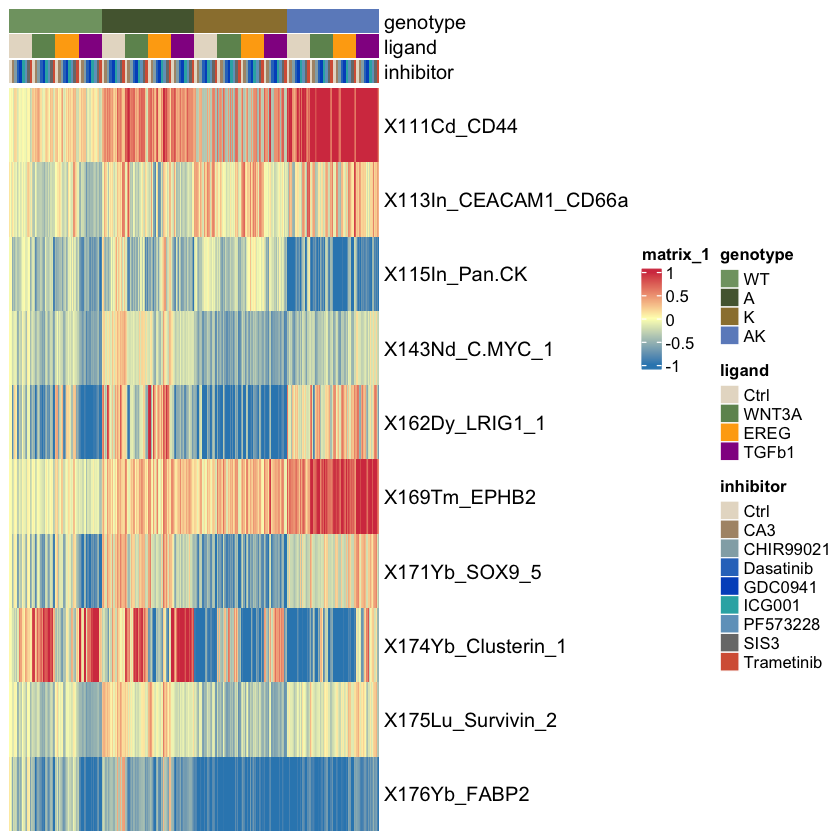

In [6]:
# ---
# Complex Heatmap
# ---

mat <- emd_df_subset_cell_type %>%
  as.matrix() %>%
  t()
quantile(mat, c(0.02, 0.98)) # Determine the range of the colour scale
colour <- circlize::colorRamp2(c(-1, 0, 1), c("#3288BD", "#FEFEBD", "#D53E4F"))
# mat <- emd_df_subset_full_panel %>%
#     as.matrix() %>%
#     t()
# quantile(mat, c(0.02, 0.98)) # Determine the range of the colour scale
# colour <- circlize::colorRamp2(c(-1.5, 0, 0.5), c("#3288BD", "#FEFEBD", "#D53E4F"))

ha <- HeatmapAnnotation(
  genotype = factor(emd_df_subset_metadata[, "genotype"], levels = c("WT", "A", "K", "AK")),
  ligand = factor(emd_df_subset_metadata[, "ligand"], levels = c(
    "Ctrl",
    "WNT3A",
    "EREG",
    "TGFb1"
  )),
  inhibitor = factor(emd_df_subset_metadata[, "inhibitor"], levels = c(
    "Ctrl",
    "CA3",
    "CHIR99021",
    "Dasatinib",
    "GDC0941",
    "ICG001",
    "PF573228",
    "SIS3",
    "Trametinib"
  )),
  col = list(
    genotype = c(
      "WT" = "#80A171",
      "A" = "#54653D",
      "K" = "#9B7F3C",
      "AK" = "#6C8DC6"
    ),
    ligand = c(
      "Ctrl" = "#E6DCCB",
      "WNT3A" = "#6E925E",
      "EREG" = "#FEAA11",
      "TGFb1" = "#932192"
    ),
    inhibitor = c(
      "Ctrl" = "#E6DCCB",
      "CA3" = "#D76144",
      "CHIR99021" = "#93ADB4",
      "ICG001" = "#2EB0B2",
      "Dasatinib" = "#7A80FF",
      "Trametinib" = "#7B00FF",
      "GDC0941" = "#CD0578",
      "PF573228" = "#990090",
      "SIS3" = "#AE9576"
    )
  )
)

Heatmap(mat,
  cluster_rows = FALSE,
  cluster_columns = FALSE,
  col = colour,
  top_annotation = ha
)


In [7]:
# Save heatmap
p <- Heatmap(mat,
  cluster_rows = FALSE,
  cluster_columns = FALSE,
  col = colour,
  top_annotation = ha
)
pdf(here(
  "output",
  "test_cell-type_heatmap_no-norm.pdf"
), width = 12, height = 9)
p
dev.off()


pdf 
  2